In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Load dữ liệu

In [49]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
# Loại bỏ cột id vì nó không liên quan đến kết quả dự đoán
# Có đúng 1 người giới tính không xác định nên để dễ dàng, ta loại bỏ luôn
df.drop(columns=['id'], inplace= True)
df.drop(df[df['gender']=='Other'].index, inplace=True)

### Ý nghĩa của các features:
1. Gender: Giới tính
2. Age: Tuổi
3. Hypertension: 1 nếu bị huyết áp cao, 0 nếu không bị
4. Heart_disease: 1 nếu bị đau tim, 0 nếu không bị
5. Ever_Married: 1 nếu đã kết hôn, 0 nếu chưa
6. Work_type: Trạng thái làm việc.
7. Loại nhà ở: Thành thị/ Nông thôn
8. Avg_glucose_level: Lượng đường trung bình
9. BMI: Chỉ số BMI
10. Smoking_status: Tình trạng hút thuốc

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [52]:
# Với các kiểu dữ liệu không phải dạng số
categories = ["gender","ever_married","work_type","Residence_type","smoking_status"]

def convert_cat(df, categories):
    for cat in categories:
        df[cat] = df[cat].astype("category")

convert_cat(df, categories)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   int64   
 3   heart_disease      5109 non-null   int64   
 4   ever_married       5109 non-null   category
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                4908 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 305.1 KB


In [54]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [55]:
df.describe(include=['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


## Trực quan hóa dữ liệu

In [56]:
categories_data = categories + ["hypertension", "heart_disease"]
num_data = ["age", "avg_glucose_level	", "bmi"]

In [57]:
def visualizeCat(features):
    cols, rows = 3, 3
    fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 15))
    for r in range(rows):
        for c in range(cols):
            i = r * cols + c
            if i < len(categories_data):
                ax_i = ax[r, c]
                sns.countplot(df, x=categories_data[i], ax=ax_i)
                ax_i.set_title(f"Figure {i+1}")
    ax.flat[-1].set_visible(False)
    plt.tight_layout()
    plt.show()

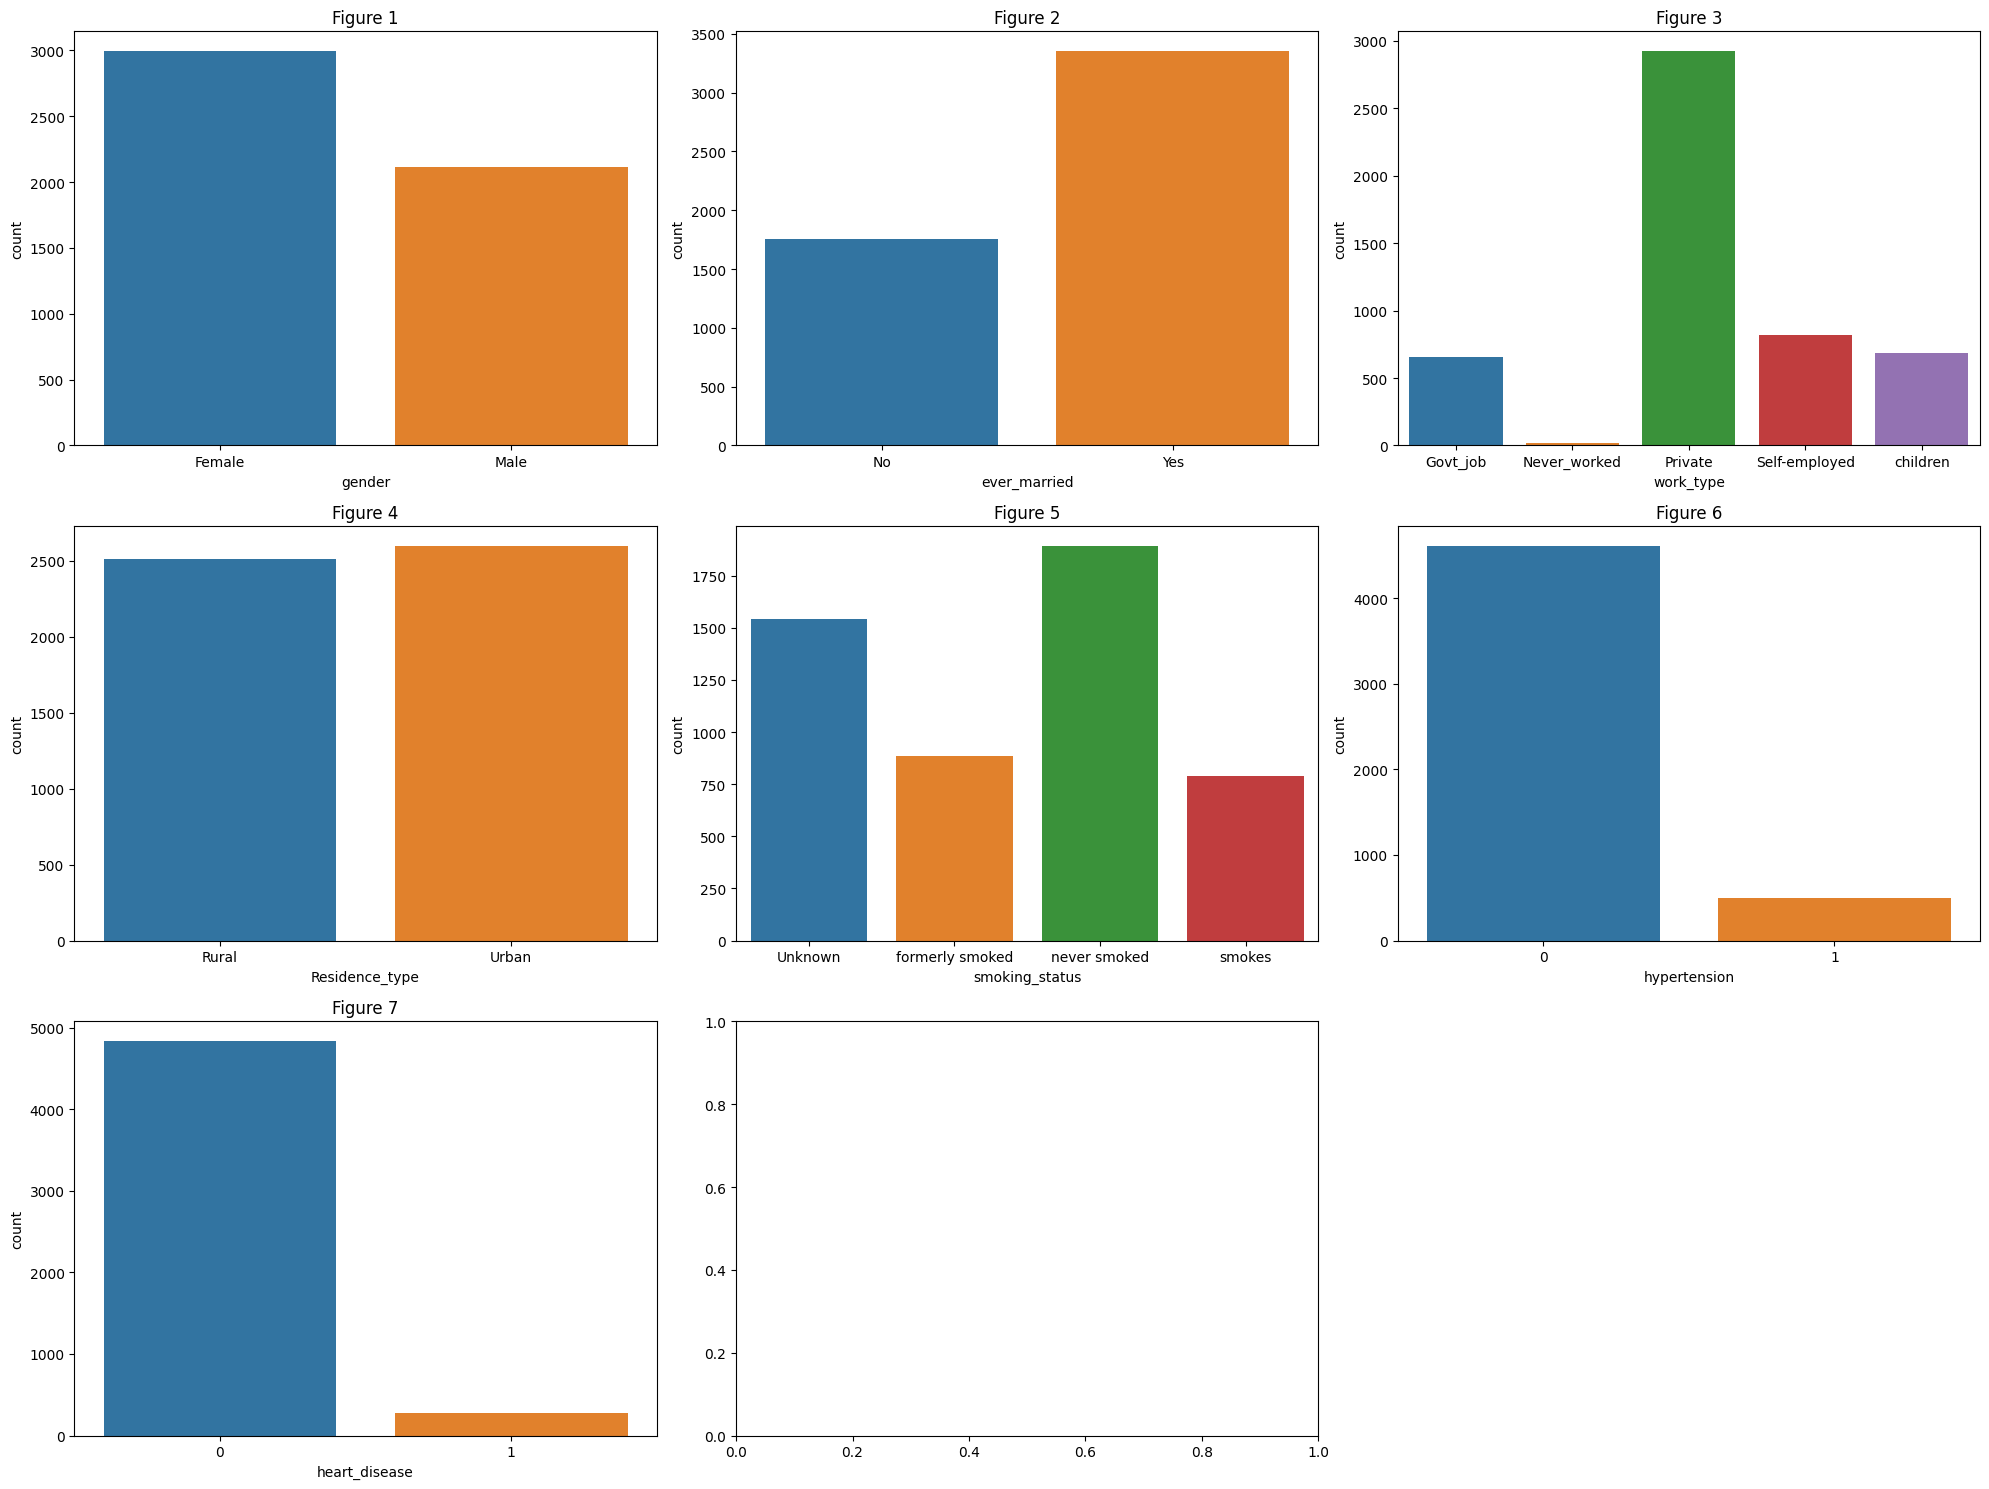

In [58]:
visualizeCat(categories_data)

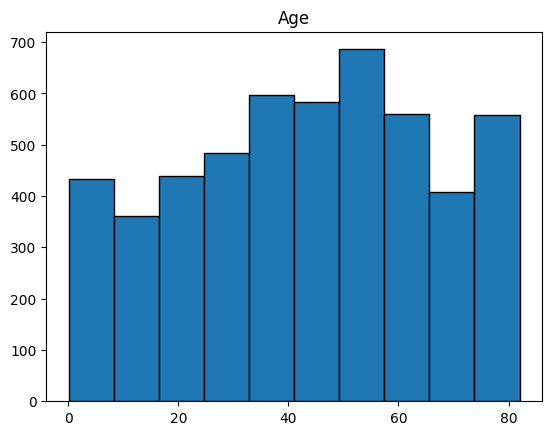

In [59]:
plt.hist(x=df['age'], bins = 10,edgecolor='black')
plt.title('Age')
plt.show()

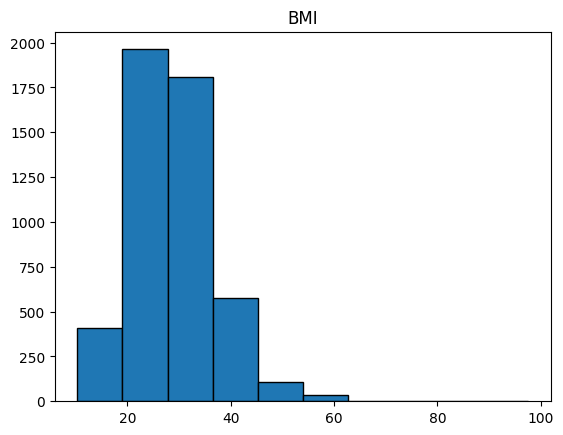

In [60]:
plt.hist( x=df["bmi"], bins=10, edgecolor="black")
plt.title("BMI")
plt.show()

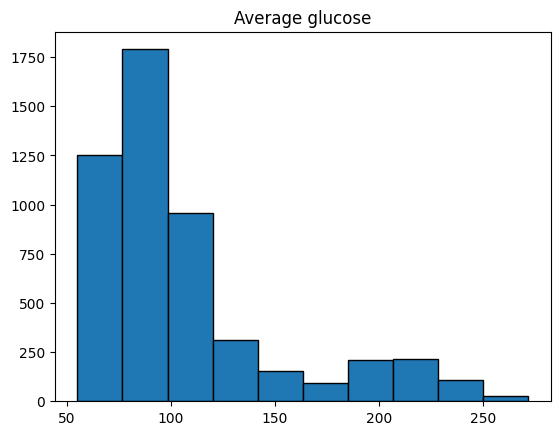

In [61]:
plt.hist(x=df["avg_glucose_level"], bins=10, edgecolor="black")
plt.title("Average glucose")
plt.show()

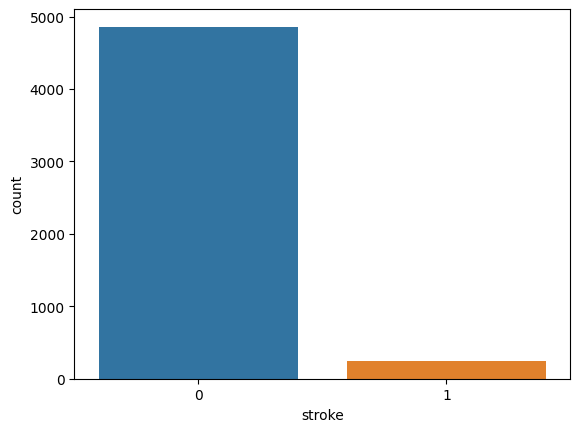

In [62]:
sns.countplot(df, x = "stroke")
plt.show()

### Tương quan dữ liệu

In [63]:
stroke_dataset = df[df["stroke"] == 1]

In [64]:
def getDataPie(column):
  data = list(stroke_dataset[column].unique())
  sizes = [len(stroke_dataset[stroke_dataset[column] == i]) for i in data]
  return (data, sizes)

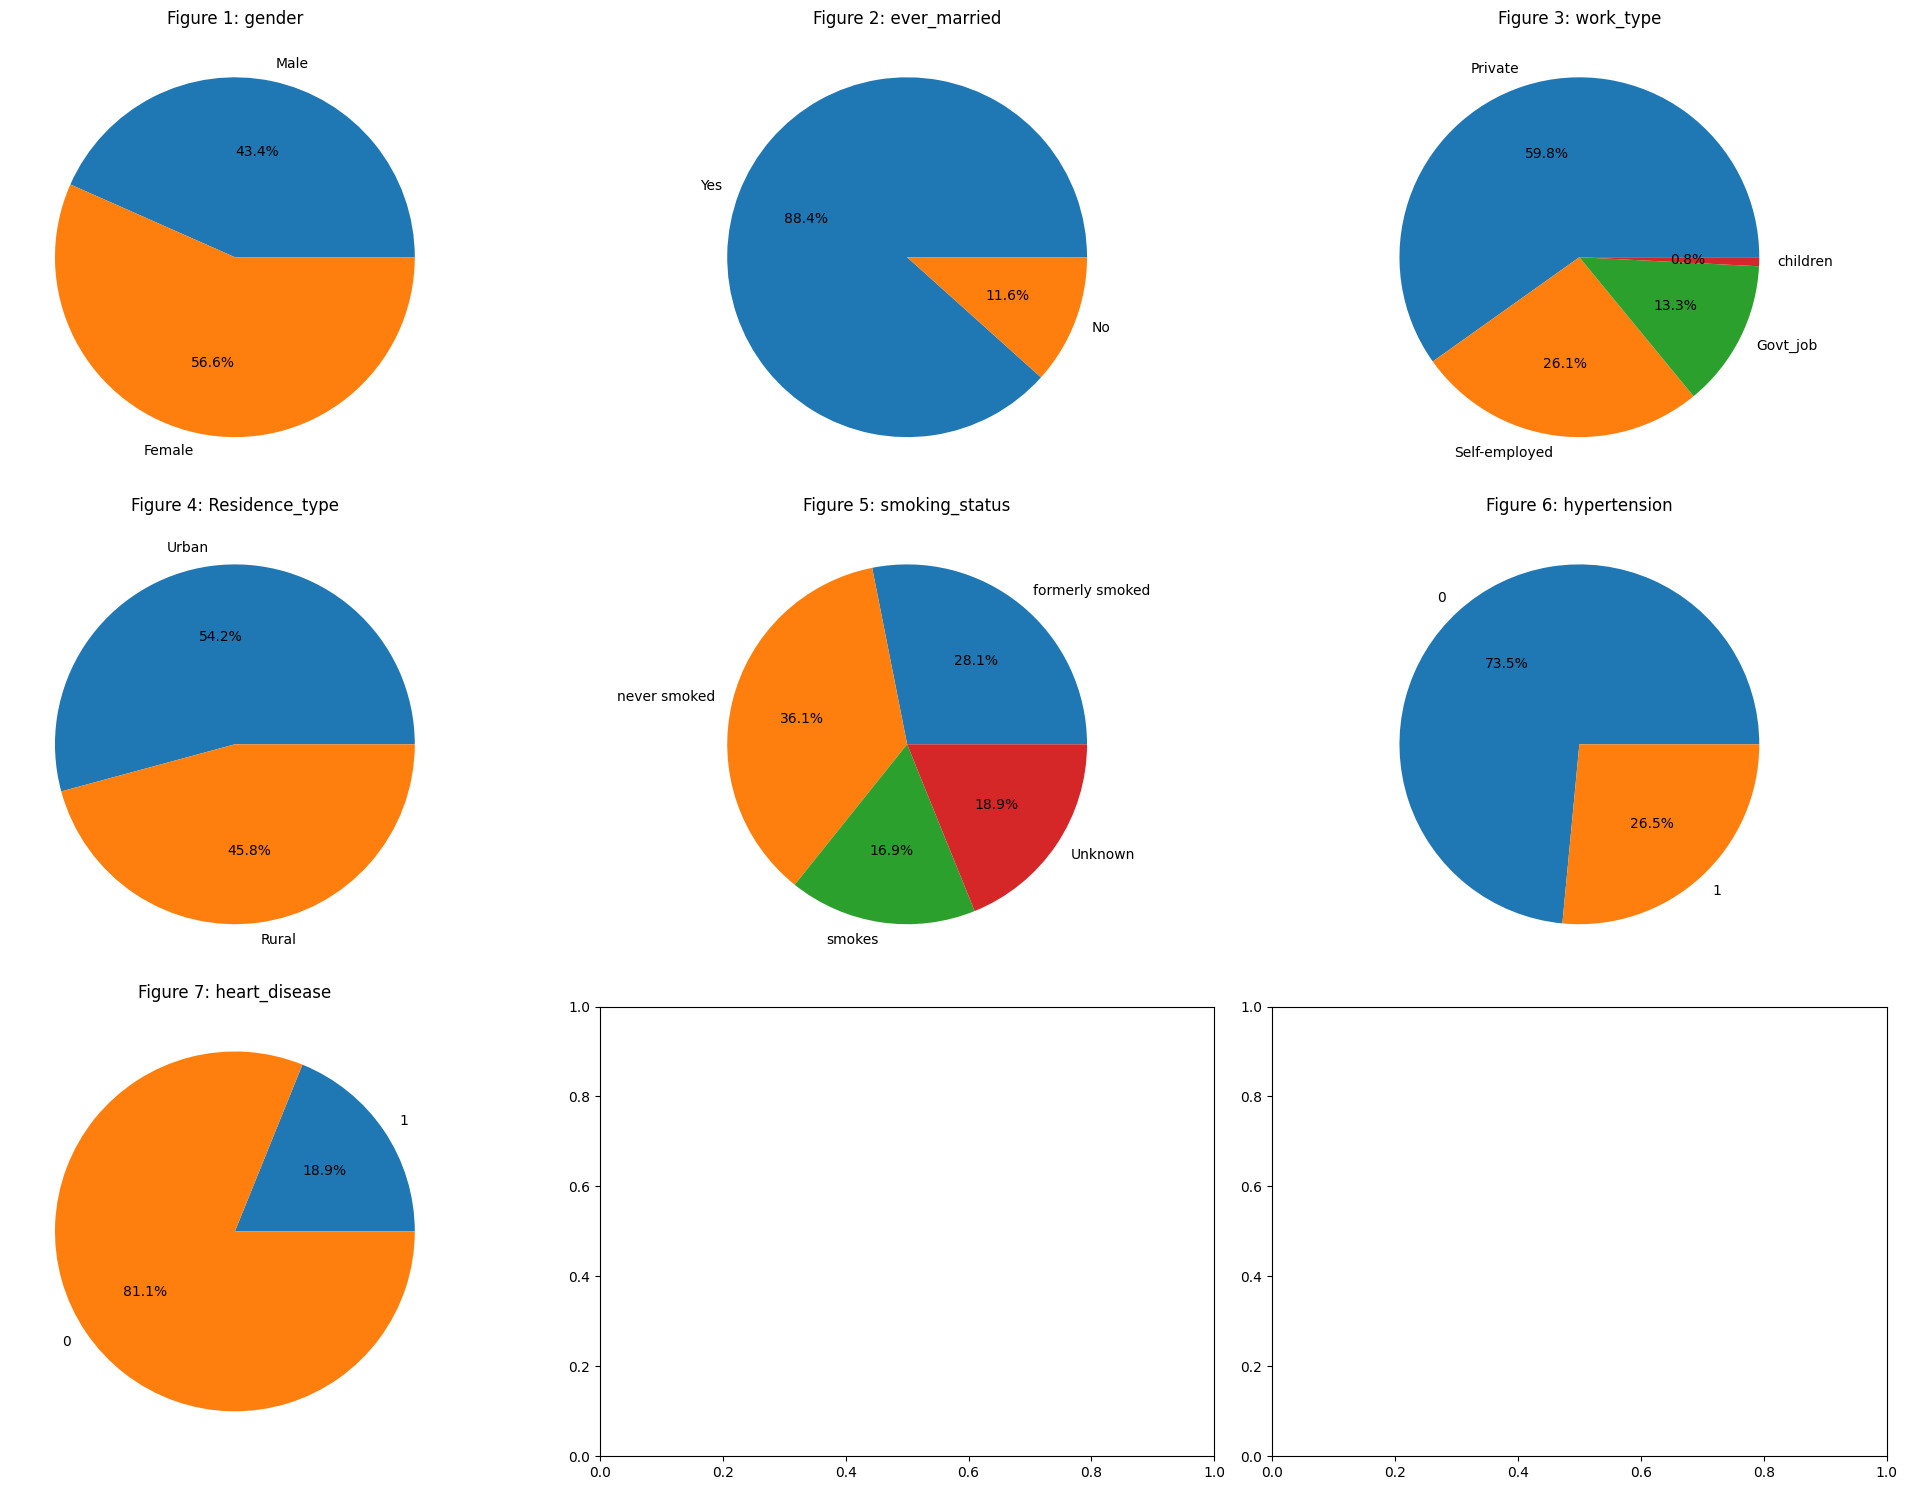

In [65]:
cols, rows = 3, 3
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 15))
for r in range(rows):
  for c in range(cols):
    i = r * cols + c
    if i < len(categories_data):
      feature = categories_data[i]
      ax_i = ax[r, c]
      data, sizes = getDataPie(feature)
      ax_i.pie(sizes, labels = data, autopct="%1.1f%%")
      ax_i.set_title(f"Figure {i+1}: {feature}")
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

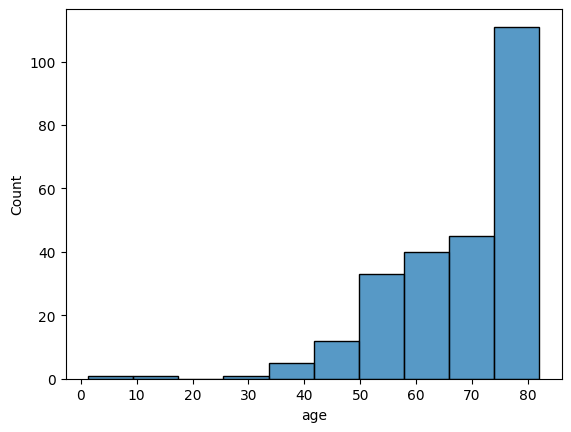

In [66]:
sns.histplot(stroke_dataset, x = 'age', bins = 10)

<Axes: xlabel='bmi', ylabel='Count'>

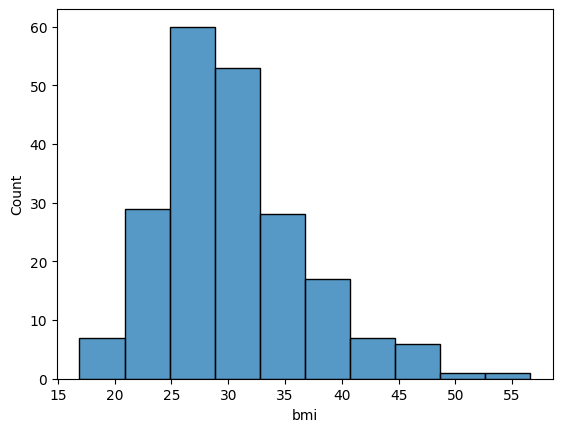

In [67]:
sns.histplot(stroke_dataset, x = 'bmi', bins = 10)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

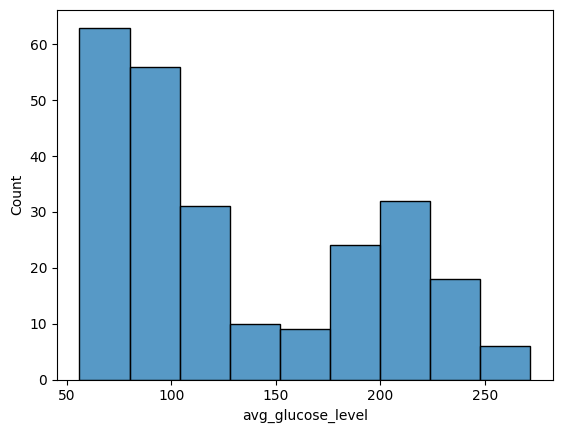

In [68]:
sns.histplot(stroke_dataset, x="avg_glucose_level")

<Axes: xlabel='stroke', ylabel='count'>

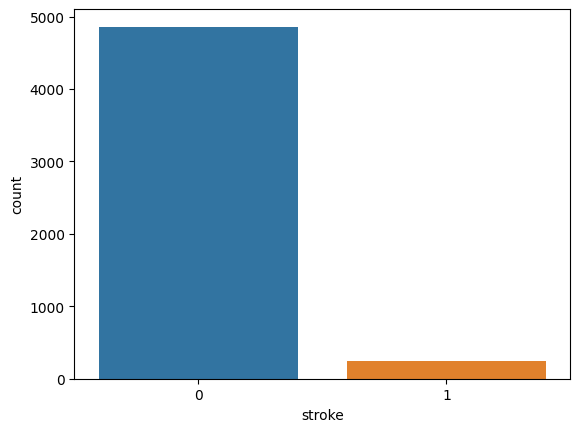

In [69]:
sns.countplot(df, x='stroke')

In [70]:
enc = OneHotEncoder(handle_unknown="ignore")
for i in categories:
    values = enc.fit_transform(df[[i]]).toarray()
    columns = enc.categories_[0]
    for j in range(len(columns)):
        df[columns[j]] = values[:, j]
    df.drop([i], axis=1, inplace=True)

In [74]:
corr = df.corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
age,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239,0.027752,-0.027752,-0.679084,0.679084,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
hypertension,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891,-0.021223,0.021223,-0.164187,0.164187,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
heart_disease,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905,-0.085685,0.085685,-0.114601,0.114601,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991,-0.054722,0.054722,-0.155329,0.155329,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341,0.026164,-0.026164,-0.341553,0.341553,...,-0.028615,0.208205,0.072634,-0.448779,0.000293,-0.000293,-0.270481,0.107463,0.107847,0.088261
stroke,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000,-0.009081,0.009081,-0.108299,0.108299,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
Female,0.027752,-0.021223,-0.085685,-0.054722,0.026164,-0.009081,1.000000,-1.000000,-0.030171,0.030171,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408
Male,-0.027752,0.021223,0.085685,0.054722,-0.026164,0.009081,-1.000000,1.000000,0.030171,-0.030171,...,0.011486,-0.032502,-0.026045,0.089226,0.006105,-0.006105,0.059557,0.043121,-0.098952,0.011408
No,-0.679084,-0.164187,-0.114601,-0.155329,-0.341553,-0.108299,-0.030171,0.030171,1.000000,-1.000000,...,0.090873,-0.154104,-0.192637,0.544658,0.005988,-0.005988,0.332335,-0.171960,-0.102663,-0.105132
Yes,0.679084,0.164187,0.114601,0.155329,0.341553,0.108299,0.030171,-0.030171,-1.000000,1.000000,...,-0.090873,0.154104,0.192637,-0.544658,-0.005988,0.005988,-0.332335,0.171960,0.102663,0.105132


<Axes: >

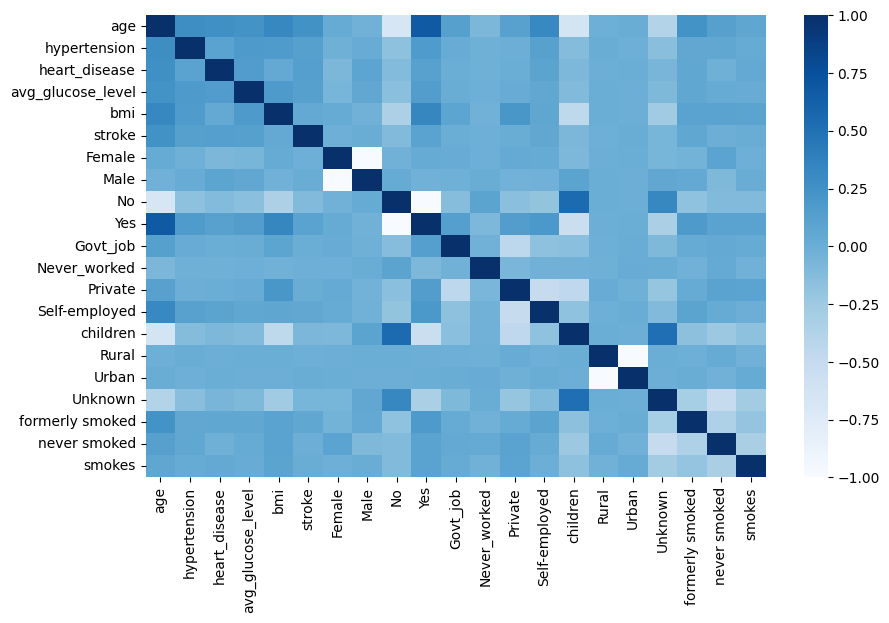

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues')